In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Regression models predict a continuous variable, such as the sales made on a day or predict temperature of a city.

Their reliance on a polynomial (like a straight line) to fit a dataset possesses a real challenge when it comes towards building a classification capability.

Let’s imagine that you fit a line with the training points you have. Imagine you want to add another data point, but to fit it, you need to change your existing model (maybe the threshold itself, as well). This will happen with each data point that we add to the model; hence, linear regression isn’t good for classification models.

In [11]:
#### 
# Pandas df with companies properties
####

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

mean = np.random.normal(0.0015, 0.001, len(symbol_dict))

std = np.random.poisson(1, len(symbol_dict))/1000
cov = np.outer(std, std)

returns = np.random.multivariate_normal(mean, cov, 1000)
returns += np.random.normal(0, .01, size=returns.shape)

df = pd.DataFrame(returns, columns=symbol_dict.keys())

df1 = df.add(1).cumprod().add(-1)
df1.tail()

,TOT,XOM,CVX,COP,VLO,MSFT,IBM,TWX,CMCSA,CVC,...,PFE,SNY,NVS,KMB,R,GD,RTN,CVS,CAT,DD
995,0.177591,5.563711,2.257698,3.737358,9.343297,1.657434,3.708765,10.503425,7.321090,-0.538064,...,1.353195,-0.660509,26.615717,11.677315,3.767092,1.986456,-0.427675,4.686634,-0.773918,1.454862
996,0.185962,5.611878,2.268789,3.763193,9.296428,1.723572,3.780843,10.726514,7.456239,-0.539690,...,1.341225,-0.663025,26.667057,11.854395,3.722283,2.065660,-0.424472,4.681141,-0.775025,1.448794
997,0.180922,5.654853,2.293479,3.815706,9.345972,1.760192,3.784332,10.786348,7.457548,-0.535348,...,1.383926,-0.663173,27.088873,11.943301,3.735409,2.071132,-0.428464,4.752855,-0.778021,1.434179
998,0.178952,5.669261,2.291149,3.857807,9.331110,1.801073,3.749345,10.846673,7.441849,-0.539624,...,1.426051,-0.662840,27.211729,11.944655,3.743457,2.067771,-0.429551,4.779504,-0.778567,1.431116
999,0.167856,5.688417,2.295562,3.936838,9.410589,1.807364,3.797107,10.862552,7.421018,-0.548198,...,1.389085,-0.657612,26.716912,12.119814,3.733769,2.014441,-0.432202,4.709409,-0.780991,1.476877


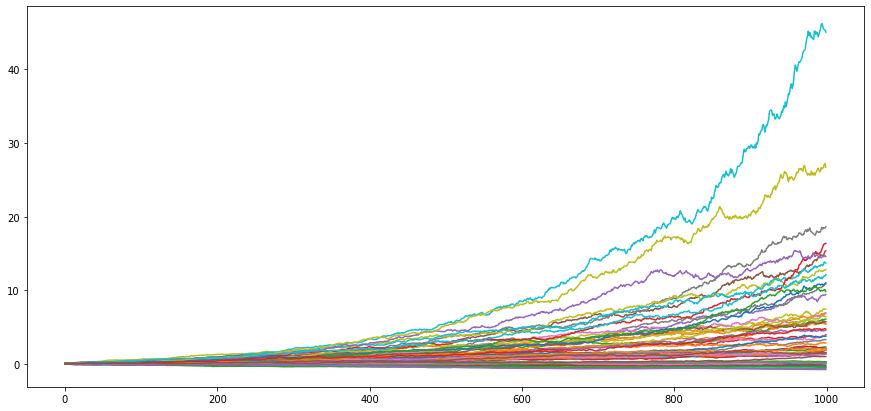

In [16]:
plt.figure(figsize=(15,7))
plt.plot(df1)
plt.show()

In [27]:
X, y = df.drop('AMZN', axis=1), df['AMZN']
pca = PCA()

pipe = Pipeline(steps=[
    ('pca', pca),
    ('reg', BayesianRidge()),
])

param_grid = {
    'pca__n_components': [2**n for n in np.arange(1,6)],
    'reg': [KNeighborsRegressor(), Ridge(), DecisionTreeRegressor(), BayesianRidge()],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('reg',
                                        BayesianRidge(alpha_1=1e-06,
                                                      alpha_2=1e-06,
                                                      alpha_init=None,
                                                      compute_score=False,
                                                      copy_X=True,
                                                      fit_intercept=True,
                                                      lambda_

In [45]:
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_reg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.025585,0.019147,0.002598,4.892590e-04,2,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...","{'pca__n_components': 2, 'reg': BayesianRidge(...",0.020773,0.051028,0.095960,0.009253,0.003224,0.036048,0.034183,1
7,0.021188,0.020447,0.013792,2.159615e-02,4,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...","{'pca__n_components': 4, 'reg': BayesianRidge(...",0.018266,0.049049,0.091498,0.000158,0.003169,0.032428,0.034245,2
11,0.038179,0.022173,0.002797,3.996191e-04,8,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...","{'pca__n_components': 8, 'reg': BayesianRidge(...",0.017424,0.057042,0.074755,0.003338,-0.000247,0.030462,0.030057,3
15,0.035779,0.017072,0.002998,1.507891e-07,16,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...","{'pca__n_components': 16, 'reg': BayesianRidge...",0.014155,0.035234,0.083843,-0.002005,0.003517,0.026949,0.031166,4
19,0.031701,0.011549,0.000400,7.996559e-04,32,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, al...","{'pca__n_components': 32, 'reg': BayesianRidge...",0.019701,0.027103,0.068464,0.008202,0.010049,0.026704,0.021967,5
17,0.026985,0.013275,0.009395,1.329790e-02,32,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","{'pca__n_components': 32, 'reg': Ridge(alpha=1...",-0.009456,0.011020,0.019143,-0.013322,0.008826,0.003242,0.012491,6
1,0.025185,0.016083,0.011193,1.590809e-02,2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","{'pca__n_components': 2, 'reg': Ridge(alpha=1....",-0.011969,0.012731,0.018897,-0.014870,0.008974,0.002752,0.013610,7
5,0.026585,0.018151,0.011393,1.629500e-02,4,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","{'pca__n_components': 4, 'reg': Ridge(alpha=1....",-0.012185,0.012975,0.018685,-0.015503,0.008740,0.002542,0.013787,8
9,0.023587,0.014000,0.003598,2.243782e-03,8,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","{'pca__n_components': 8, 'reg': Ridge(alpha=1....",-0.012048,0.012965,0.018849,-0.015028,0.007659,0.002479,0.013582,9
13,0.030782,0.021982,0.012793,2.009216e-02,16,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","{'pca__n_components': 16, 'reg': Ridge(alpha=1...",-0.011737,0.011174,0.019592,-0.015796,0.007767,0.002200,0.013654,10
